In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc)

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
pet

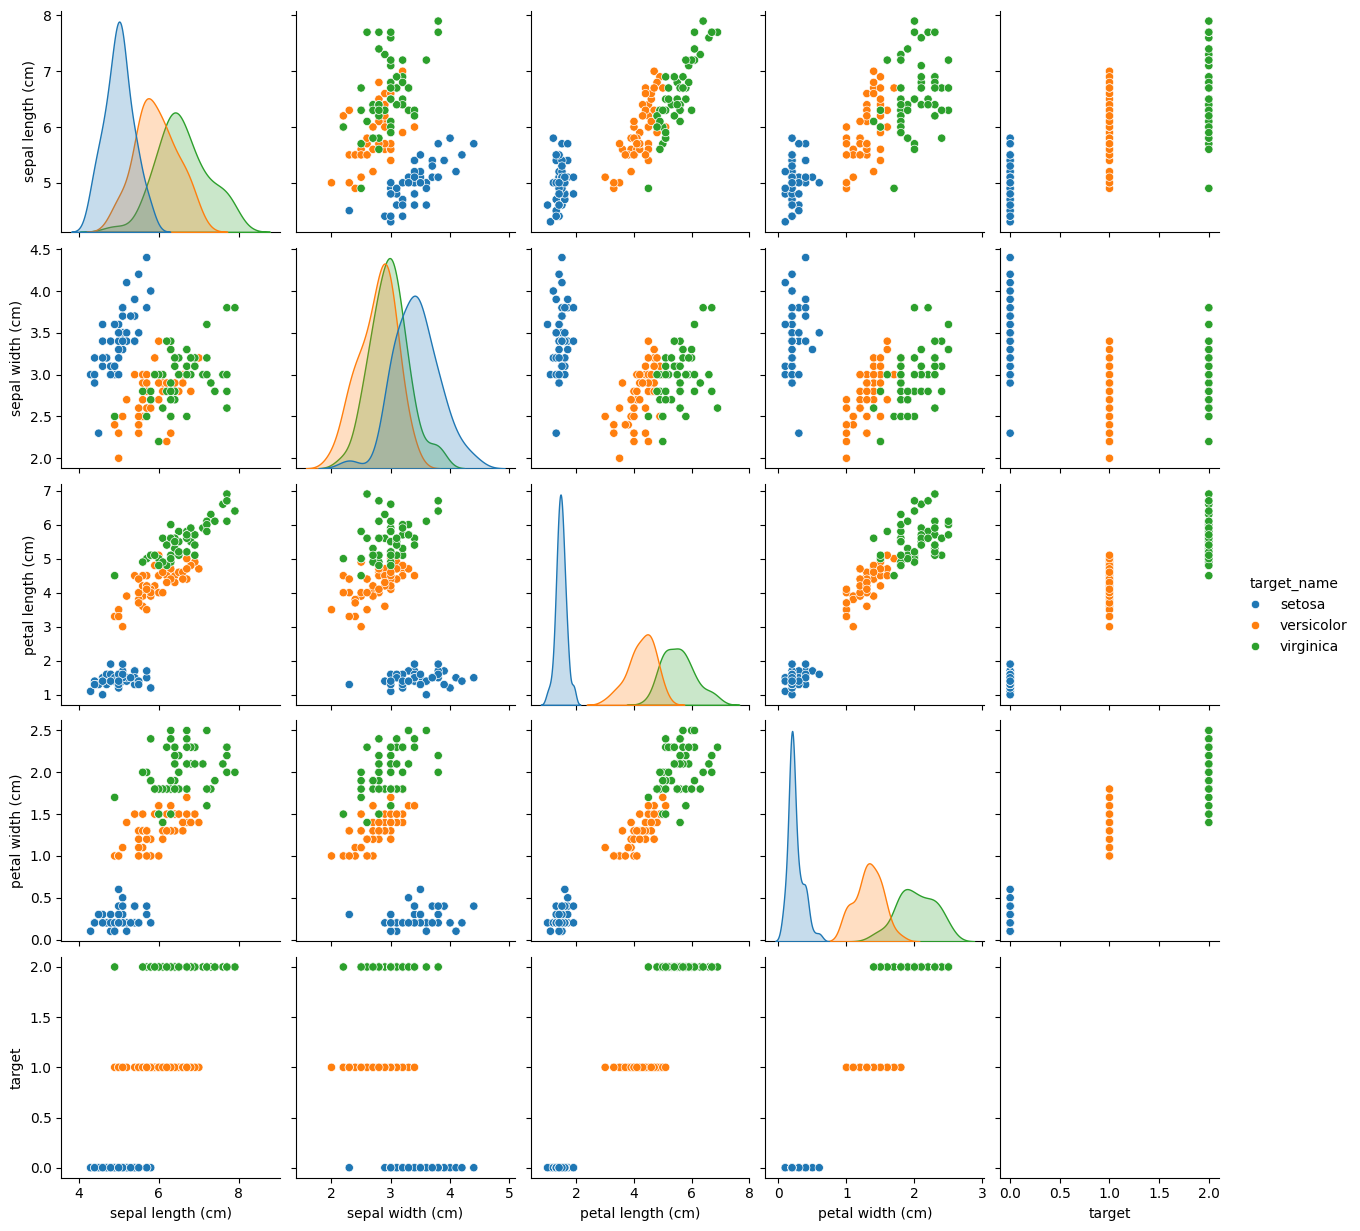

In [76]:
print(df.describe())
print(df.isnull().sum())
sns.pairplot(df, hue='target_name')
plt.show()
X = df[iris.feature_names]
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
    )

In [79]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

In [80]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

In [81]:
def evaluate_model(y_true, y_pred):
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F1-score: {f1_score(y_true, y_pred, average='weighted'):.2f}")

In [82]:
print("=== Logistic Regression ===")
evaluate_model(y_test, y_pred_lr)



=== Logistic Regression ===
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [83]:
print("\n=== Decision Tree ===")
evaluate_model(y_test, y_pred_dt)


=== Decision Tree ===
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [84]:
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score_lr = logreg.predict_proba(X_test)

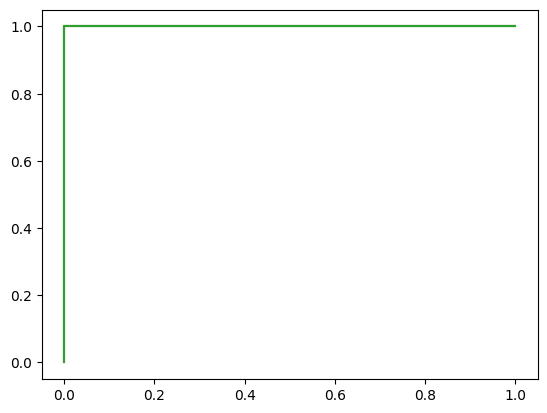

In [85]:
plt.figure()
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_lr[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')


/tmp/ipython-input-3385735170.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


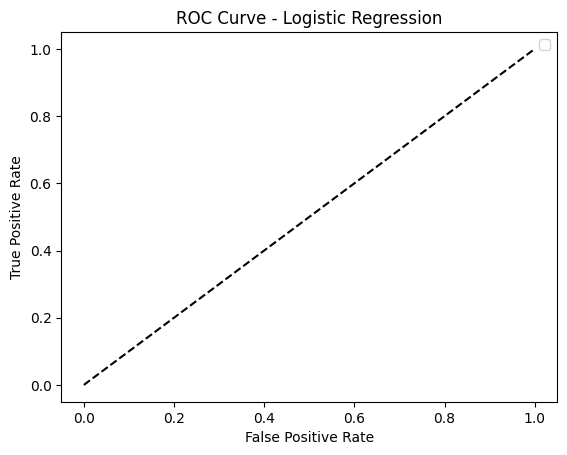

In [86]:
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()